In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from gluonts.dataset.repository.datasets import get_dataset
from statsmodels.tsa.seasonal import STL

/home/hakon/miniforge3/envs/oodts/lib/python3.9/site-packages/gluonts/json.py:45: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [2]:
save_dir = "../figures/"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir, exist_ok=True)

ts = next(iter(get_dataset("m4_monthly").test))["target"][-100:]
decomp = STL(ts, period=12).fit()

In [3]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression(fit_intercept=True).fit(
    np.arange(len(decomp.trend)).reshape(-1, 1), decomp.trend
)
predictions = linreg.predict(np.arange(len(decomp.trend)).reshape(-1, 1))
residuals = decomp.trend - predictions

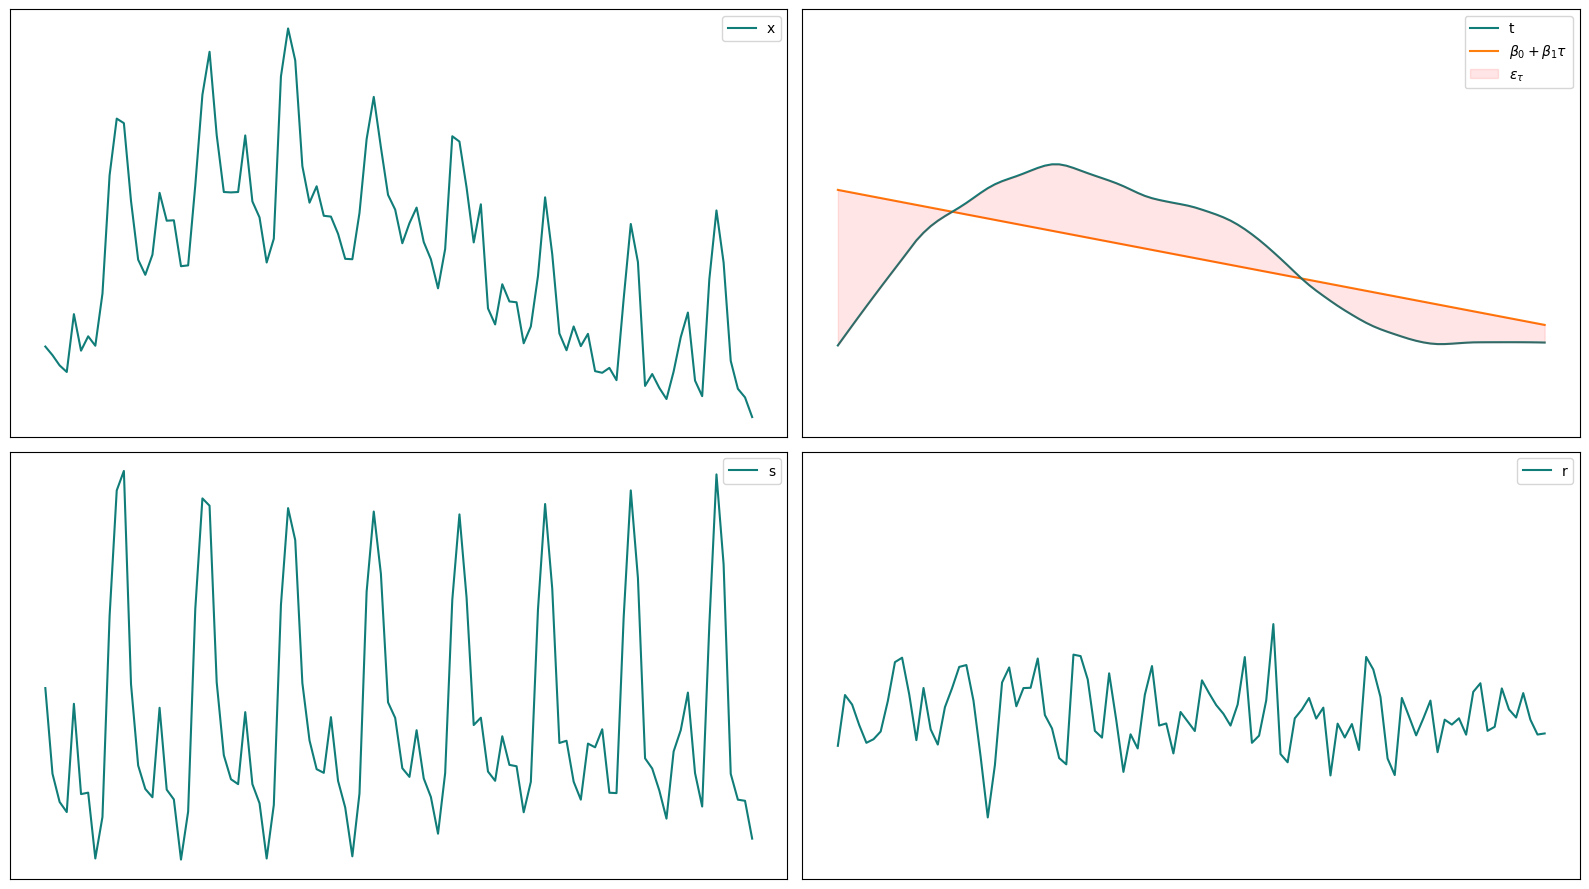

In [4]:
from matplotlib.patches import FancyArrowPatch

_, (row1, row2) = plt.subplots(2, 2, figsize=(16, 9), sharey="row", tight_layout=True)

row1[0].plot(ts, label=r"x", color="#107D79")
row1[0].set_xticks([])
row1[0].set_yticks([])
row1[0].legend()

row1[1].plot(decomp.trend, label=r"t", color="#107D79", zorder=1)
row1[1].plot(predictions, label=r"$\beta_0 + \beta_1 \tau$", color="C1", zorder=0)
row1[1].fill_between(
    np.arange(len(decomp.trend)),
    predictions,
    decomp.trend,
    color="red",
    alpha=0.1,
    label=r"$\epsilon_{\tau}$",
)

# residual_index = 30
# annotation_y = predictions[residual_index] + (decomp.trend[residual_index] - predictions[residual_index]) / 2

# arrow = FancyArrowPatch(
#     posA=(residual_index, predictions[residual_index]),
#     posB=(residual_index, decomp.trend[residual_index]),
#     arrowstyle='<->',
#     mutation_scale=10,
#     color='red',
#     linewidth=1
# )
# row1[1].add_patch(arrow)

# row1[1].annotate(
#     r"$\epsilon_{\tau}$",
#     xy=(residual_index, annotation_y),
#     xytext=(residual_index, annotation_y),
# )

row1[1].set_xticks([])
row1[1].set_yticks([])
row1[1].legend()

row2[0].plot(decomp.seasonal, label=r"s", color="#107D79")
row2[0].set_xticks([])
row2[0].set_yticks([])
row2[0].legend()

row2[1].plot(decomp.resid, label=r"r", color="#107D79")
row2[1].set_xticks([])
row2[1].set_yticks([])
row2[1].legend()

plt.savefig(os.path.join(save_dir, "decomposition.png"))